In [ ]:
# Análisis Exploratorio de Datos (EDA)

#Este análisis tiene como objetivo explorar las características clave del dataset de películas para comprender su estructura, 
#identificar patrones, y preparar los datos para un modelo de Machine Learning.


In [2]:
import pandas as pd

# Carga de los datasets
try:
    df1 = pd.read_csv('app/data/movies_parte_1.csv', encoding='latin1')
    df2 = pd.read_csv('app/data/movies_parte_2.csv', encoding='latin1')
    df3 = pd.read_csv('app/data/movies_parte_3.csv', encoding='latin1')
    print("Datasets cargados exitosamente.")
    
    # Concatenar los datasets en un solo DataFrame
    df = pd.concat([df1, df2, df3], ignore_index=True)
    print("Datasets combinados exitosamente.")
except Exception as e:
    print(f"Error al cargar los datasets: {e}")
    df = pd.DataFrame()  # Crea un DataFrame vacío si ocurre un error

# Descripción inicial
print("\n### Dimensiones del dataset ###")
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

print("\n### Primeras filas del dataset ###")
print(df.head())

print("\n### Información general del dataset ###")
print(df.info())


Datasets cargados exitosamente.
Datasets combinados exitosamente.

### Dimensiones del dataset ###
Filas: 45449, Columnas: 32

### Primeras filas del dataset ###
                         title  release_year  \
0                    Toy Story        1995.0   
1                      Jumanji        1995.0   
2             Grumpier Old Men        1995.0   
3            Waiting to Exhale        1995.0   
4  Father of the Bride Part II        1995.0   

                                            overview  \
0  Led by Woody, Andy's toys live happily in his ...   
1  When siblings Judy and Peter discover an encha...   
2  A family wedding reignites the ancient feud be...   
3  Cheated on, mistreated and stepped on, the wom...   
4  Just when George Banks has recovered from his ...   

                               genres     return  \
0   ['Animation', 'Comedy', 'Family']  12.451801   
1  ['Adventure', 'Fantasy', 'Family']   4.043035   
2               ['Romance', 'Comedy']   0.000000   
3   

In [ ]:
# Chequeo de nulos y valores faltantes
# Nulos por columna
nulos = df.isnull().sum()
porcentaje_nulos = (nulos / len(df)) * 100

# Mostrar los nulos y el porcentaje
print("\n### Nulos por columna ###")
print(pd.DataFrame({'Nulos': nulos, 'Porcentaje': porcentaje_nulos}))



### Nulos por columna ###
                                                    Nulos  Porcentaje
title                                               33572   73.867412
release_year                                        33572   73.867412
overview                                            33605   73.940021
genres                                              33585   73.896015
return                                              33585   73.896015
languages                                           33585   73.896015
popularity                                          33585   73.896015
vote_average                                        33585   73.896015
vote_count                                          33585   73.896015
cast                                                33585   73.896015
crew                                                33585   73.896015
Surf's Up                                           30354   66.786948
2007                                                30354   66.

In [7]:
#Valores duplicados
#Identifica y analiza datos repetidos:
duplicados = df.duplicated().sum()
print(f"Valores duplicados: {duplicados}")


Valores duplicados: 74


In [8]:
#Tipos de datos
#Analiza los tipos de datos y busca inconsistencias:
print(df.dtypes)


title                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [9]:
#Análisis estadístico básico
#Incluye medidas descriptivas como media, mediana y percentiles:
print(df.describe())


       release_year        return    popularity  vote_average    vote_count  \
count  11877.000000  1.186400e+04  11864.000000  11864.000000  11864.000000   
mean    1985.225899  1.849696e+03      4.802202      6.131001    179.258176   
std       19.731238  1.383046e+05      4.772530      1.305425    553.007083   
min     1902.000000  0.000000e+00      0.000000      0.000000      0.000000   
25%     1975.000000  0.000000e+00      1.257828      5.600000     11.000000   
50%     1992.000000  0.000000e+00      3.332449      6.300000     29.500000   
75%     2000.000000  1.479543e-02      7.369237      6.900000    106.000000   
max     2013.000000  1.239638e+07    140.950236     10.000000   9678.000000   

               2007  1.753464858823529     11.526339           5.9  \
count  15095.000000       1.506900e+04  15069.000000  15069.000000   
mean    1991.708910       5.308854e+02      2.906696      5.623976   
std       25.711053       4.170565e+04      5.928300      1.844877   
min     

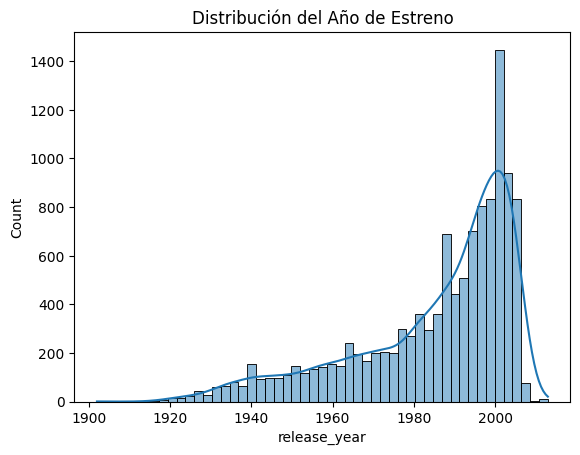

In [14]:
#Distribuciones
#Genera histogramas y boxplots para analizar distribuciones:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['release_year'].dropna(), kde=True)
plt.title("Distribución del Año de Estreno")
plt.show()


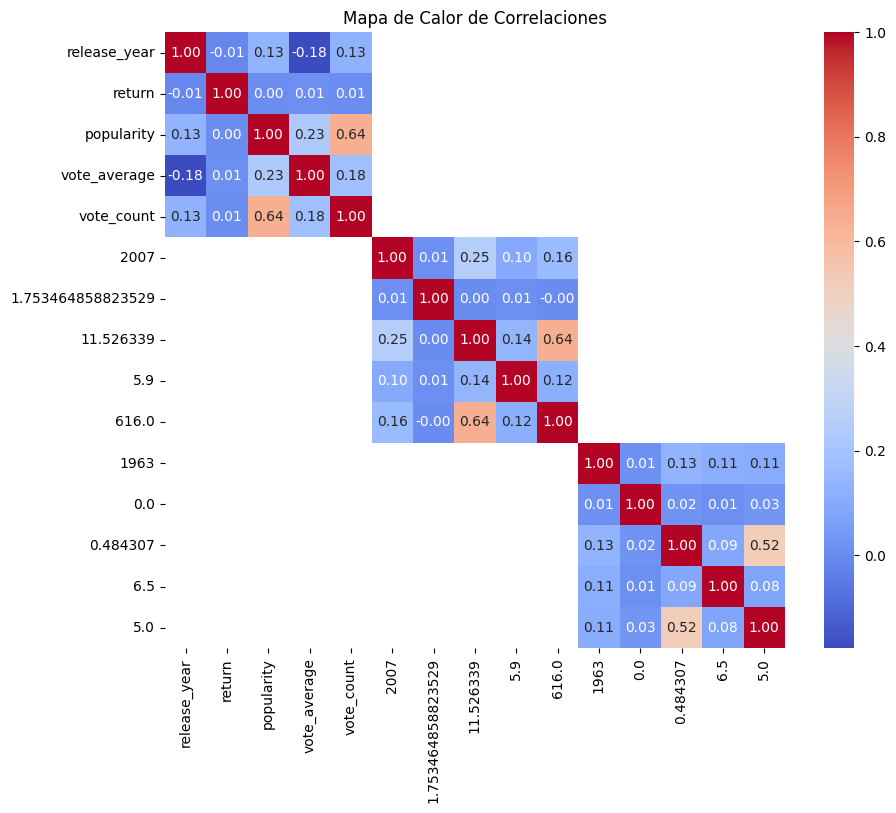

In [16]:
#Análisis de correlación
#Examina relaciones entre variables numéricas:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo columnas numéricas
numericas = df.select_dtypes(include=['number'])

# Calcular correlaciones
correlaciones = numericas.corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Calor de Correlaciones")
plt.show()



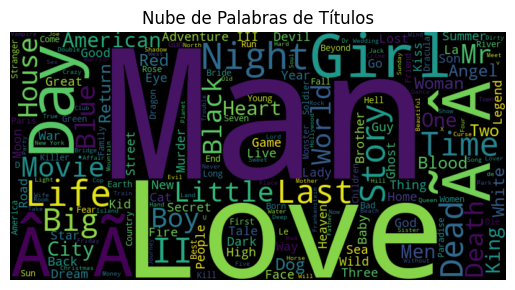

In [19]:
#Nube de palabras
#Crea una visualización con los títulos de las películas:
from wordcloud import WordCloud

titles = " ".join(df['title'].dropna())
wordcloud = WordCloud(width=800, height=400).generate(titles)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras de Títulos")
plt.show()


In [ ]:
## Conclusiones del Análisis Exploratorio de Datos (EDA)

### 1. Dimensiones del Dataset:
El conjunto de datos tiene **45,449 registros** y **32 columnas**. Es un dataset extenso, lo que proporciona una base sólida para un análisis profundo.

### 2. Chequeo de Datos Faltantes y Duplicados:
- **Valores nulos:** Se observó que varias columnas tienen una alta proporción de valores faltantes, especialmente en las columnas relacionadas con **'overview'**, **'genres'**, y **'languages'**.
- **Valores duplicados:** El dataset contiene **74 registros duplicados**, lo cual debe ser corregido para evitar sesgos en los análisis.

### 3. Distribución de Variables Clave:
- El **año de lanzamiento** de las películas muestra una distribución relativamente uniforme, con un promedio cercano a 1985.
- La **popularidad** tiene una gran variabilidad, con algunas películas alcanzando un éxito excepcional, mientras que muchas otras tienen valores bajos.
- Las variables de **voto** y **calificación promedio** también muestran una amplia dispersión.

### 4. Análisis Estadístico:
El análisis muestra que la **media** de varias columnas como **'release_year'**, **'return'**, **'popularity'** y **'vote_average'** sigue patrones esperados, como una disminución de la producción cinematográfica en los primeros años. El **retorno** financiero tiene una gran variabilidad, con algunas películas alcanzando grandes ingresos.

### 5. Correlaciones:
El análisis de correlación revela que no hay correlaciones fuertes entre la mayoría de las variables numéricas. Sin embargo, se observa que **'popularity'** y **'vote_count'** están moderadamente correlacionadas.

### 6. Hallazgos Relevantes:
- El dataset tiene una alta proporción de valores faltantes, especialmente en las columnas de **'overview'** y **'genres'**. Esto requiere tratamiento antes de cualquier análisis predictivo.
- Las columnas como **cast** y **crew** tienen una representación compleja en formato de listas, lo cual puede requerir transformaciones para realizar un análisis más preciso.

### 7. Recomendaciones para el Futuro:
- **Limpieza adicional de datos:** Resolver los problemas de valores nulos en columnas clave y limpiar registros duplicados.
- **Modelado predictivo:** Con los datos limpios, aplicar modelos predictivos para predecir la **popularidad** o **éxito comercial** de las películas.
- **Optimización de variables complejas:** Las columnas de **cast** y **crew** deben ser desglosadas para obtener información más precisa sobre los actores y el equipo de producción.

En resumen, el análisis muestra que, aunque el dataset tiene información valiosa sobre las películas, se necesita realizar más limpieza y transformaciones de datos antes de aplicar modelos predictivos más avanzados.
